In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
#%matplotlib
#%matplotlib inline

In [2]:
viral_ref = pd.read_csv("vscont.csv")
viral_res = pd.read_csv("new_bac_vir_s_min30.csv")
viral_data = pd.merge(viral_ref, viral_res, on='bin')
viral_data.head()

,bin,comp,cont,est_cont
0,0,0.9133,0.1683,0.137998
1,1,0.8685,0.0000,0.037618
2,2,0.7680,0.0000,0.000000
3,3,0.6851,0.0000,0.000000
4,4,0.7482,0.0000,0.000000


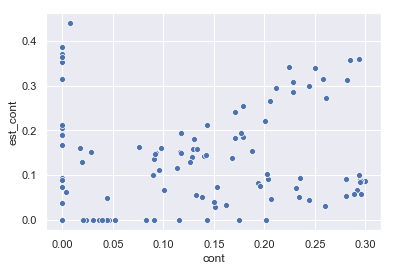

In [3]:
sns.scatterplot('cont','est_cont', data=viral_data)

In [4]:
# classification
viral_data['is_contaminated'] = np.where(viral_data['cont'] > 0.05 , 1, 0)
viral_data['is_predicted'] = np.where(viral_data['est_cont'] > 0.05 , 1, 0)
tn, fp, fn, tp = confusion_matrix(viral_data['is_predicted'], viral_data['is_contaminated']).ravel()

In [5]:
acc = (tp+tn)/(tn+fp+fn+tp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)

print("accuracy: ", acc)
print("sensitivity: ", sens)
print("specificity: ", spec)

accuracy:  0.845
sensitivity:  0.7692307692307693
specificity:  0.8934426229508197


In [6]:
viral_data['error'] = viral_data['est_cont'] - viral_data['cont']
rmse = (viral_data['error']**2).mean()**0.5
rmse

0.10268935101658737

## CAMI data set

In [57]:
ref = pd.read_csv("./cami_mouse.csv")
res = pd.read_csv("./new_mouse_gut_res.csv")
data = pd.merge(ref, res, on='bin')
data.head()

,bin,cont,est_cont
0,299,0.8264,0.000000
1,271,0.0000,0.000000
2,470,0.0000,0.374194
3,252,0.0000,0.214405
4,95,0.0000,0.000000


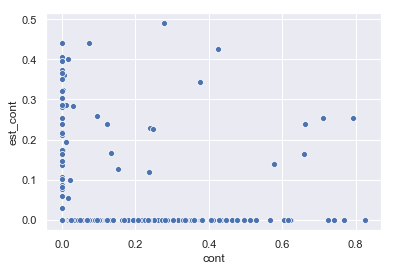

In [58]:
sns.scatterplot('cont', 'est_cont', data=data)

In [59]:
data['error'] = data['est_cont'] - data['cont']
data.loc[abs(data['error']) > 0].head()

,bin,cont,est_cont,error
0,299,0.8264,0.000000,-0.826400
2,470,0.0000,0.374194,0.374194
3,252,0.0000,0.214405,0.214405
6,184,0.0162,0.054441,0.038241
10,441,0.2297,0.000000,-0.229700


In [60]:
rmse = (data['error']**2).mean()**0.5
rmse

0.18131491350572035

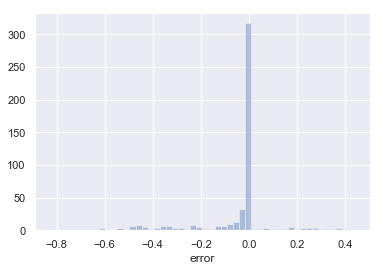

In [61]:
sns.distplot(data['error'], kde=False)

In [62]:
# classification
data['is_contaminated'] = np.where(data['cont'] > 0.05 , 1, 0)
data['is_predicted'] = np.where(data['est_cont'] > 0.05 , 1, 0)
tn, fp, fn, tp = confusion_matrix(data['is_predicted'], data['is_contaminated']).ravel()

In [63]:
acc = (tp+tn)/(tn+fp+fn+tp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)

print("accuracy: ", acc)
print("sensitivity: ", sens)
print("specificity: ", spec)

accuracy:  0.7335984095427436
sensitivity:  0.3137254901960784
specificity:  0.7809734513274337


## Bin size

In [64]:
size = pd.read_csv("./size_med.csv", sep='\t', names=['bin','size'])
data = pd.merge(data, size, on='bin')
data.loc[data['size'] > 4000000]

,bin,cont,est_cont,error,is_contaminated,is_predicted,size
0,95,0.0000,0.000000,0.000000,0,0,9688324
3,65,0.0000,0.000000,0.000000,0,0,4021780
4,60,0.0000,0.280255,0.280255,0,1,7051824
6,116,0.3124,0.000000,-0.312400,1,0,4581231
19,29,0.0000,0.000000,0.000000,0,0,6638346
34,49,0.0617,0.000000,-0.061700,1,0,5090393
35,164,0.0000,0.000000,0.000000,0,0,4131421
36,69,0.0000,0.000000,0.000000,0,0,7076874
37,83,0.0000,0.000000,0.000000,0,0,7014629
39,40,0.0000,0.000000,0.000000,0,0,6621486


12269782

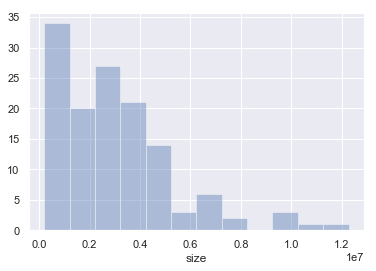

In [65]:
sns.distplot(data['size'],kde=False)
data['size'].max()

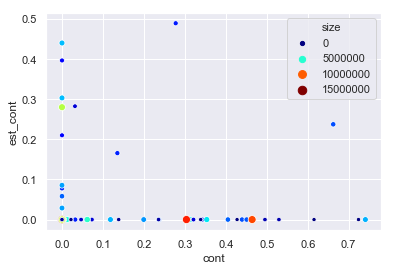

In [66]:
sns.scatterplot('cont', 'est_cont', data=data, hue='size', palette='jet',size='size')

In [67]:
small = data.loc[data['size'] < 2000000]
tn, fp, fn, tp = confusion_matrix(small['is_predicted'], small['is_contaminated']).ravel()

acc = (tp+tn)/(tn+fp+fn+tp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print("Small")
print("accuracy: ", acc)
print("sensitivity: ", sens)
print("specificity: ", spec)

med = data.loc[data['size'].all() < 5000000 and data['size'] > 2000000]
tn, fp, fn, tp = confusion_matrix(med['is_predicted'], med['is_contaminated']).ravel()

acc = (tp+tn)/(tn+fp+fn+tp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print("Medium")
print("accuracy: ", acc)
print("sensitivity: ", sens)
print("specificity: ", spec)

big = data.loc[data['size'] > 5000000]
tn, fp, fn, tp = confusion_matrix(big['is_predicted'], big['is_contaminated']).ravel()

acc = (tp+tn)/(tn+fp+fn+tp)
sens = tp/(tp+fn)
spec = tn/(tn+fp)
print("Big")
print("accuracy: ", acc)
print("sensitivity: ", sens)
print("specificity: ", spec)

Small
accuracy:  0.7142857142857143
sensitivity:  0.25
specificity:  0.7555555555555555
Medium
accuracy:  0.7710843373493976
sensitivity:  0.25
specificity:  0.8266666666666667
Big
accuracy:  0.7894736842105263
sensitivity:  0.0
specificity:  0.8333333333333334
